In [1]:
import pandas as pd


df = pd.read_csv("/kaggle/input/ai-job-postings/cleaned_data (1).csv")

# Check dataset info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2995, 8)


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...","Not-Specified,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,","Not-Specified,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,Not-Specified,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D","Not-Specified,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [2]:
# 1. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# 2. Drop duplicate rows (if any)
df = df.drop_duplicates()

# 3. Remove extra spaces in column names (clean column headers)
df.columns = df.columns.str.strip()

# 4. Quick check of unique values in each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:5])  # show first 5 unique values


Missing values per column:
 Company                       0
Job Title                     0
Location                      0
Job Type                      0
Experience level              0
Salary                        0
Requirment of the company     0
Facilities                    0
dtype: int64

Column: Company
['SGS' 'Ocorian' 'Cricut' 'Bosch Group' 'Publicis Groupe']

Column: Job Title
['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' 'Application Developer & Data Analyst'
 'Data Engineer Full time (Public Sector) USA']

Column: Location
['Richardson, TX, United States' 'Ebène, Mauritius'
 'South Jordan, UT, United States' 'Nonantola, Italy'
 'Arlington, VA, United States']

Column: Job Type
['Full Time' 'Internship' 'Part Time']

Column: Experience level
['Entry-level' 'Not-Specified' 'Mid-level' 'Senior-level'
 'Executive-level']

Column: Salary
[' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *']

Column: Requirment of the company
['Computer Science,Data

Top 10 Job Titles:
 Job Title
Data Engineer                       104
Data Scientist                       82
Data Analyst                         77
Senior Data Engineer                 63
Machine Learning Engineer            47
Senior Data Scientist                37
Senior Data Analyst                  36
Senior Machine Learning Engineer     21
Analytics Engineer                   17
Data Architect                       11
Name: count, dtype: int64


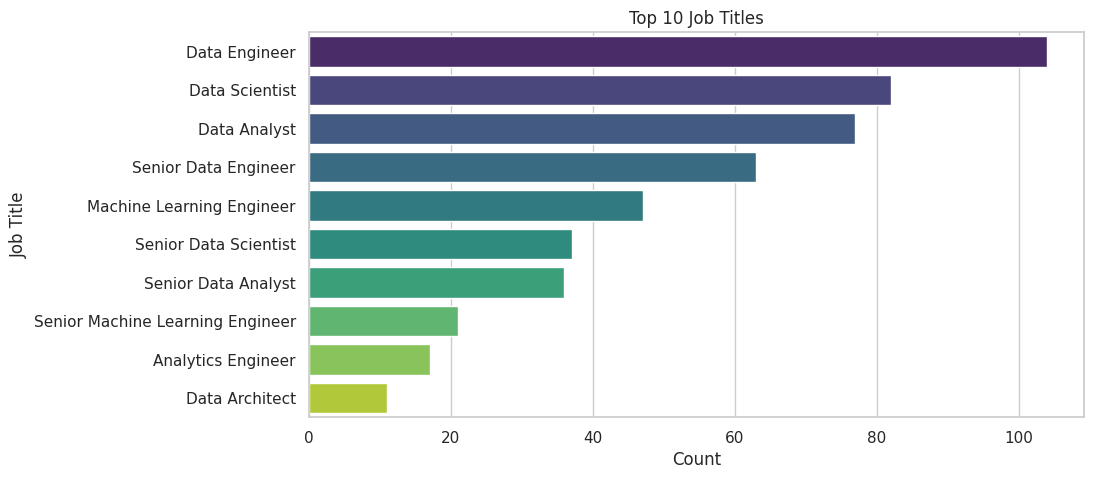


Top 10 Locations:
 Location
Bengaluru, India                    77
Remote                              62
Paris, France                       61
New York City, United States        59
London, England, United Kingdom     55
London, United Kingdom              55
San Francisco, CA                   32
Berlin, Germany                     32
San Francisco, CA, United States    30
United States                       29
Name: count, dtype: int64


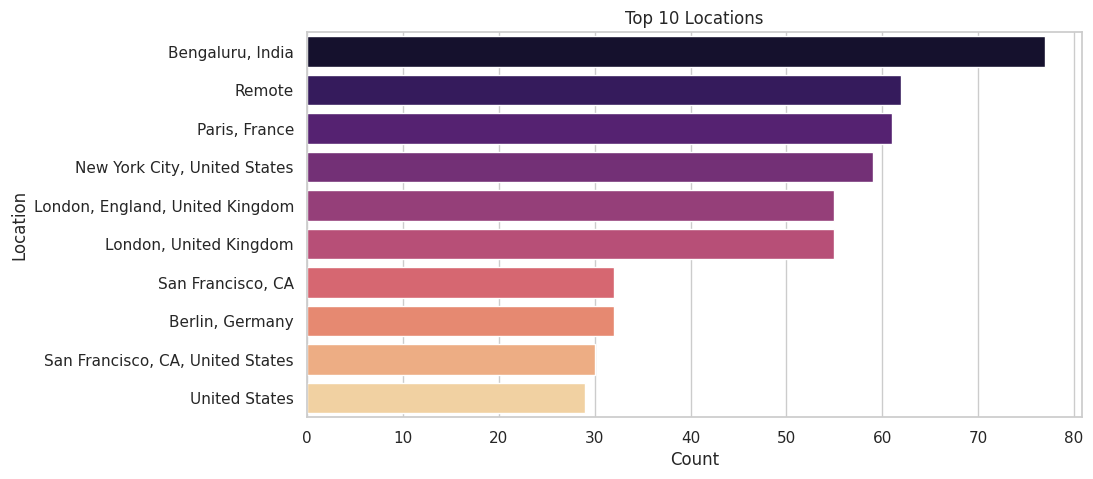

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


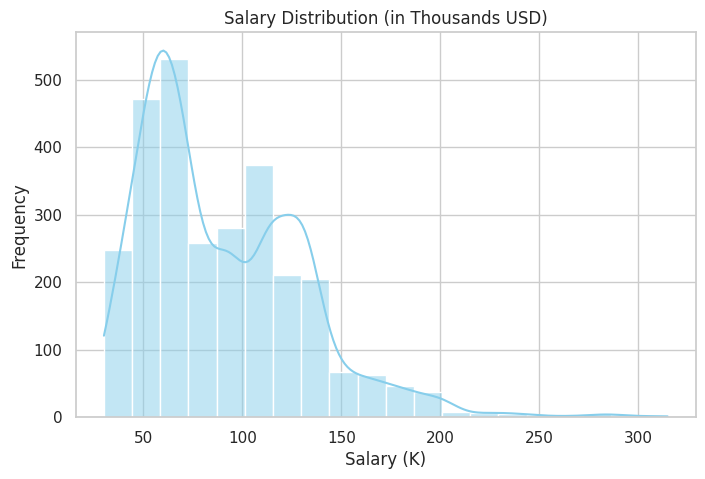


Experience Level Counts:
 Experience level
Senior-level       1746
Entry-level         462
Mid-level           438
Not-Specified       227
Executive-level     122
Name: count, dtype: int64


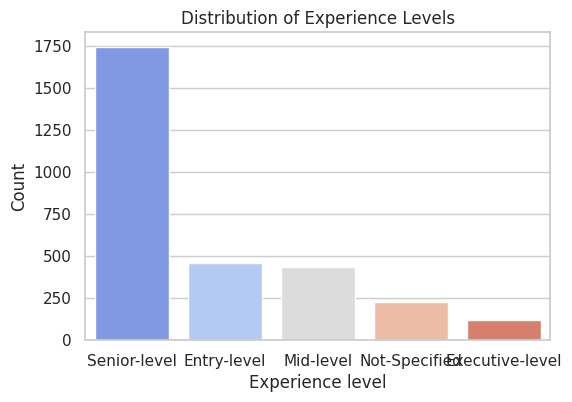

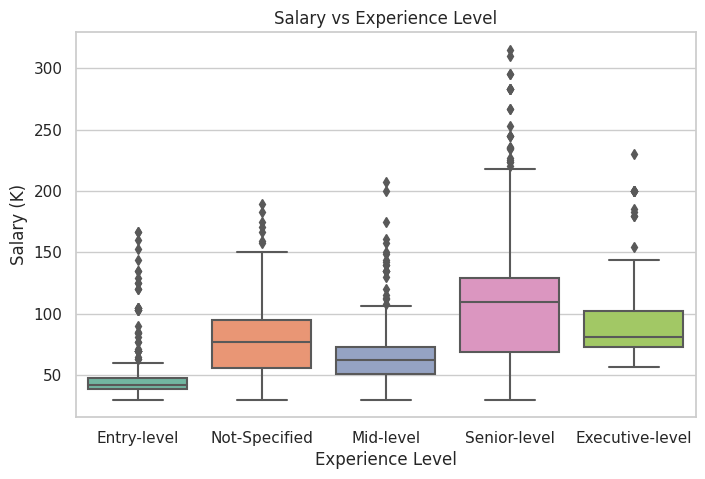

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")  # nicer plots

# 1. Most common job titles
top_jobs = df['Job Title'].value_counts().head(10)
print("Top 10 Job Titles:\n", top_jobs)

plt.figure(figsize=(10,5))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

# 2. Most common locations
top_locations = df['Location'].value_counts().head(10)
print("\nTop 10 Locations:\n", top_locations)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

# 3. Salary distribution (fix applied)
# Extract only numbers before 'K' (ignore words like "Negotiable")
df['Salary_clean'] = df['Salary'].str.extract(r'(\d+)')

# Convert to numeric
df['Salary_clean'] = pd.to_numeric(df['Salary_clean'], errors='coerce')

# Drop NaN for plotting
salary_data = df['Salary_clean'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(salary_data, bins=20, kde=True, color="skyblue")
plt.title("Salary Distribution (in Thousands USD)")
plt.xlabel("Salary (K)")
plt.ylabel("Frequency")
plt.show()

# 4. Experience level distribution
exp_counts = df['Experience level'].value_counts()
print("\nExperience Level Counts:\n", exp_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette="coolwarm")
plt.title("Distribution of Experience Levels")
plt.ylabel("Count")
plt.show()

# 5. Salary vs Experience Level (boxplot for report)
plt.figure(figsize=(8,5))
sns.boxplot(x="Experience level", y="Salary_clean", data=df, palette="Set2")
plt.title("Salary vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (K)")
plt.show()


Top 20 Technical Skills:
 [('aws', 815), ('agile', 562), ('big', 559), ('azure', 505), ('machine', 490), ('analytics', 451), ('intelligence', 431), ('apis', 354), ('pipelines', 342), ('excel', 323), ('consulting', 320), ('python', 283), ('airflow', 281), ('visualization', 280), ('deep', 273), ('finance', 209), ('bigquery', 205), ('ci', 191), ('cd', 191), ('etl', 183)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


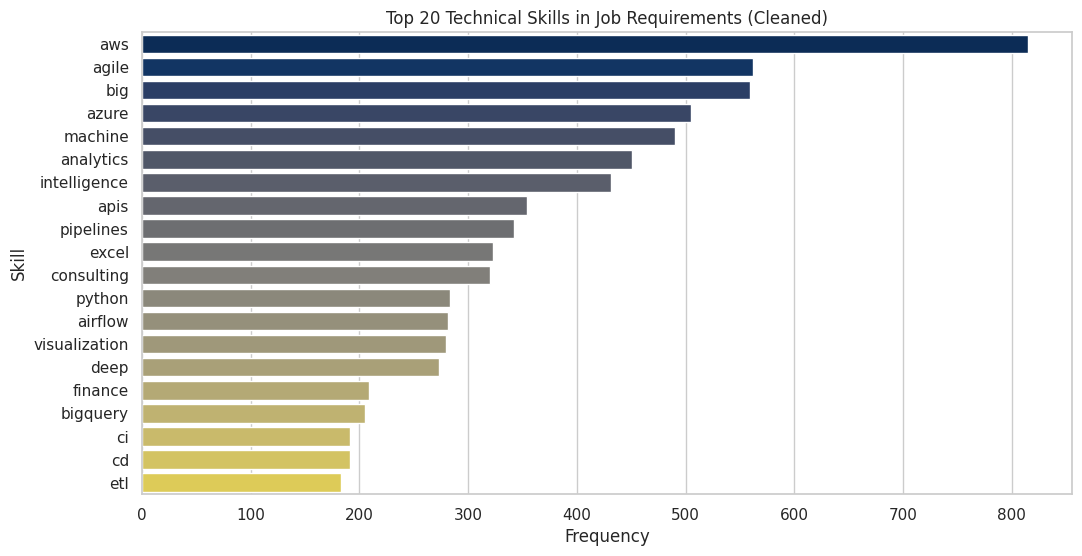

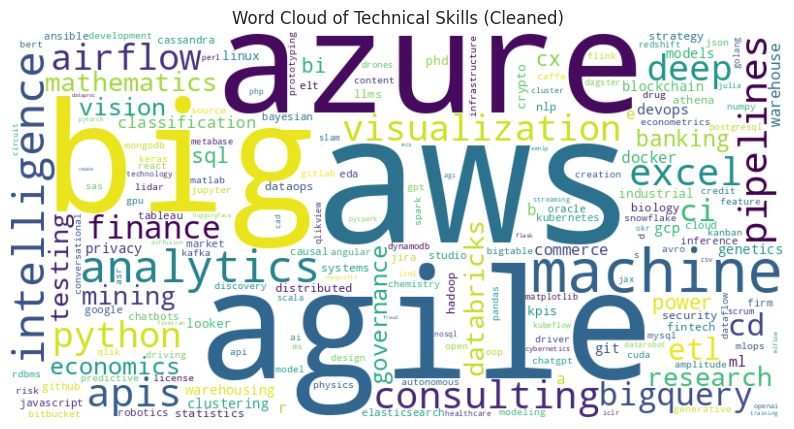

In [4]:
from collections import Counter
import re
from wordcloud import WordCloud

# 1. Combine all job requirements into one big text
all_skills_text = " ".join(df['Requirment of the company'].dropna().astype(str))

# 2. Convert to lowercase
all_skills_text = all_skills_text.lower()

# 3. Tokenize (keep only words)
tokens = re.findall(r'\b[a-zA-Z]+\b', all_skills_text)

# 4. Define stopwords (remove generic words)
custom_stopwords = set([
    "data", "computer", "science", "engineer", "engineering",
    "learning", "analysis", "business", "management", "architecture",
    "quality", "requirement", "company", "skills", "experience"
])

# 5. Remove stopwords
filtered_tokens = [word for word in tokens if word not in custom_stopwords]

# 6. Count frequency of cleaned tokens
skill_counts_cleaned = Counter(filtered_tokens)

# 7. Show top 20 cleaned skills
top_skills_cleaned = skill_counts_cleaned.most_common(20)
print("Top 20 Technical Skills:\n", top_skills_cleaned)

# 8. Plot bar chart of top 20 technical skills
skills, counts = zip(*top_skills_cleaned)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(skills), palette="cividis")
plt.title("Top 20 Technical Skills in Job Requirements (Cleaned)")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()

# 9. Word Cloud of cleaned skills
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts_cleaned)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Technical Skills (Cleaned)")
plt.show()


Cluster
0    990
1    967
2    863
3      4
Name: count, dtype: int64


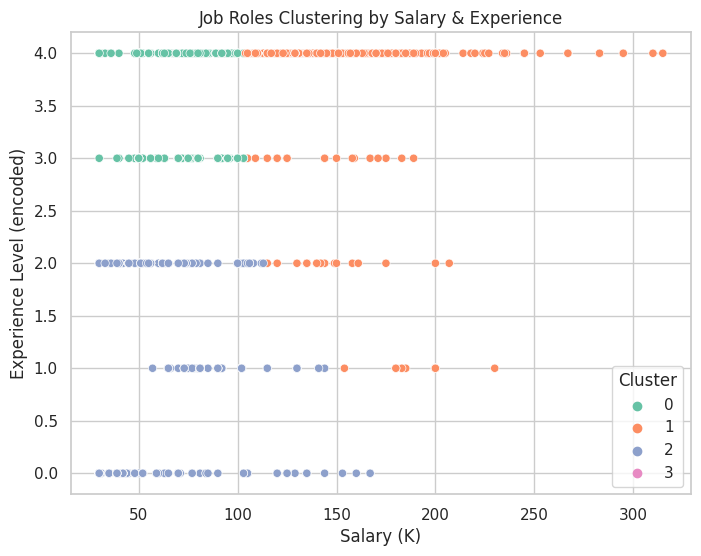

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# 1. Select features for clustering
# We'll use Salary, Experience Level, and Job Type
df_cluster = df[['Salary_clean', 'Experience level', 'Job Type']].dropna()


le_exp = LabelEncoder()
le_job = LabelEncoder()

df_cluster['Experience_encoded'] = le_exp.fit_transform(df_cluster['Experience level'])
df_cluster['JobType_encoded'] = le_job.fit_transform(df_cluster['Job Type'])


X = df_cluster[['Salary_clean', 'Experience_encoded', 'JobType_encoded']]

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Check cluster sizes
print(df_cluster['Cluster'].value_counts())

# 5. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_cluster['Salary_clean'], 
    y=df_cluster['Experience_encoded'], 
    hue=df_cluster['Cluster'], 
    palette="Set2"
)
plt.title("Job Roles Clustering by Salary & Experience")
plt.xlabel("Salary (K)")
plt.ylabel("Experience Level (encoded)")
plt.show()
